We have performed EDA while building our model; however, we performed few dedicated visualization to better understand the data and in order for improving the model selection and verify our model's outcomes

In [1]:
#uploading the csv file to google colab
from google.colab import files

uploaded = files.upload()

Saving Hotel Reservations.csv to Hotel Reservations.csv


In [2]:
#Importing the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
hotel_reservation_data = pd.read_csv('/content/Hotel Reservations.csv', parse_dates=['arrival_date'])

In [4]:
#Renaming the columns to improve our visualization experience of the user
hotel_reservation_data = hotel_reservation_data.rename({'no_of_adults':'Number of Adults',
                                    'no_of_children':'Number of Children',
                                    'no_of_weekend_nights':'Number of Weekend Nights',
                                    'no_of_week_nights':'Number of Week Nights',
                                    'type_of_meal_plan':'Type of Meal Plan' ,
                                    'required_car_parking_space':'Required Parking Space' ,
                                    'room_type_reserved':'Room Type' ,
                                    'lead_time':'Lead Time' ,
                                    'arrival_year':'Arrival Year',
                                    'arrival_month':'Arrival Month' ,
                                    'arrival_date':'Arrival Date',
                                    'market_segment_type':'Type of Market Segment' ,
                                    'repeated_guest':'Repeated Guest',
                                    'no_of_previous_cancellations':'Number of Previous Cancellations' ,
                                    'no_of_previous_bookings_not_canceled':'Number of Previous Successful Bookings' ,
                                    'avg_price_per_room':'Average Room Price',
                                    'no_of_special_requests':'Number of Special Requests' ,
                                    'booking_status':'Status' }, axis=1)

In [5]:
#Defining list of categorical data
categorical_data = ['Type of Meal Plan', 'Room Type', 'Type of Market Segment', 'Status']

In [6]:
hotel_reservation_data[categorical_data] = hotel_reservation_data[categorical_data].astype('category')

In [7]:
hotel_reservation_data['Status'] = hotel_reservation_data['Status'].replace({'Not_Canceled':False, 'Canceled':True})

In [8]:
#Formating the Room Type data
hotel_reservation_data['Room Type'] = hotel_reservation_data['Room Type'].replace({'Room_Type 1':'Type 1', 'Room_Type 2':'Type 2', 'Room_Type 3':'Type 3','Room_Type 4':'Type 4','Room_Type 5':'Type 5','Room_Type 6':'Type 6','Room_Type 7':'Type 7'})

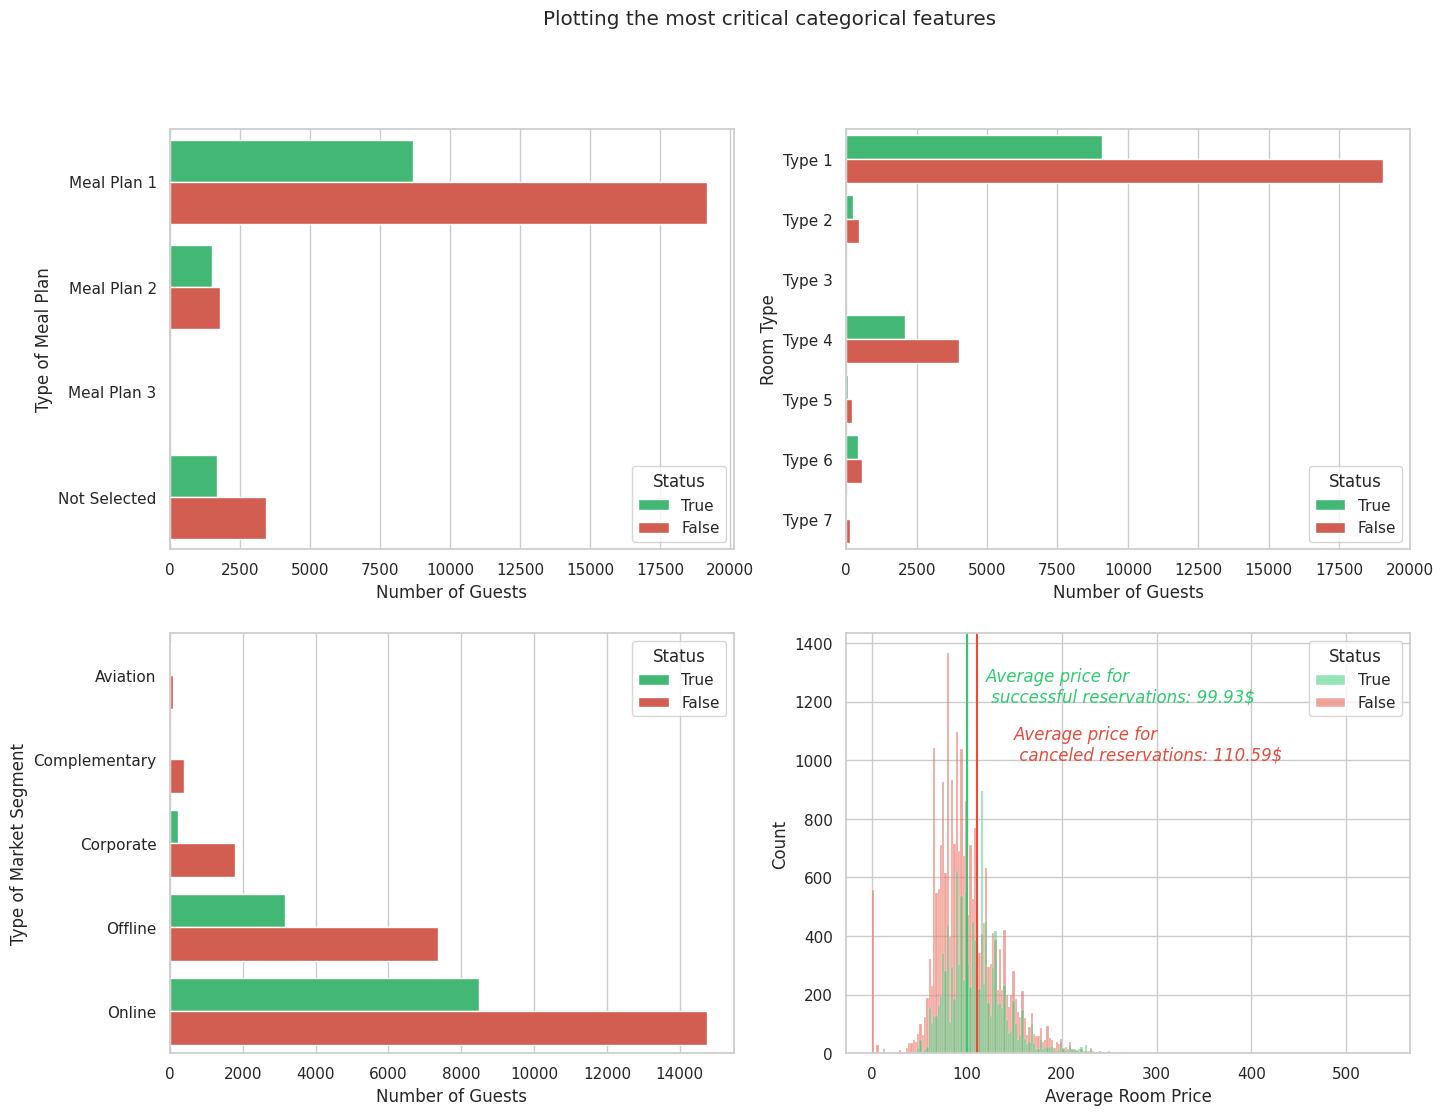

In [9]:
# Plotting Categorical Features
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette(['#2ecc71', '#e74c3c'])  # Green and Red colors
palette = sns.color_palette()

Avg_price_canceled = hotel_reservation_data[hotel_reservation_data['Status'] == True]['Average Room Price'].mean()
Avg_price_not_canceled = hotel_reservation_data[hotel_reservation_data['Status'] == False]['Average Room Price'].mean()

fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2, 2, figsize=(16,12))

fig.suptitle('Plotting the most critical categorical features')

categorical_dictionary = {'Type of Meal Plan':axis1,
             'Room Type':axis2, 
             'Type of Market Segment':axis3}

for key, value in categorical_dictionary.items():
    sns.countplot(data=hotel_reservation_data, y=key, hue='Status', ax=value, palette=palette)
    value.set_xlabel('Number of Guests')
    value.set_ylabel(f'{key}')

sns.histplot(data=hotel_reservation_data, x='Average Room Price', hue='Status', ax=axis4, palette=palette)
axis4.axvline(x=Avg_price_canceled,  color=palette[1])
axis4.axvline(x=Avg_price_not_canceled, color=palette[0])
axis4.annotate(f'Average price for \n canceled reservations: {Avg_price_canceled:.2f}$', xy=(150, 1000),fontstyle='italic', color=palette[1])
axis4.annotate(f'Average price for \n successful reservations: {Avg_price_not_canceled:.2f}$', xy=(120, 1200),fontstyle='italic', color=palette[0])
plt.show()

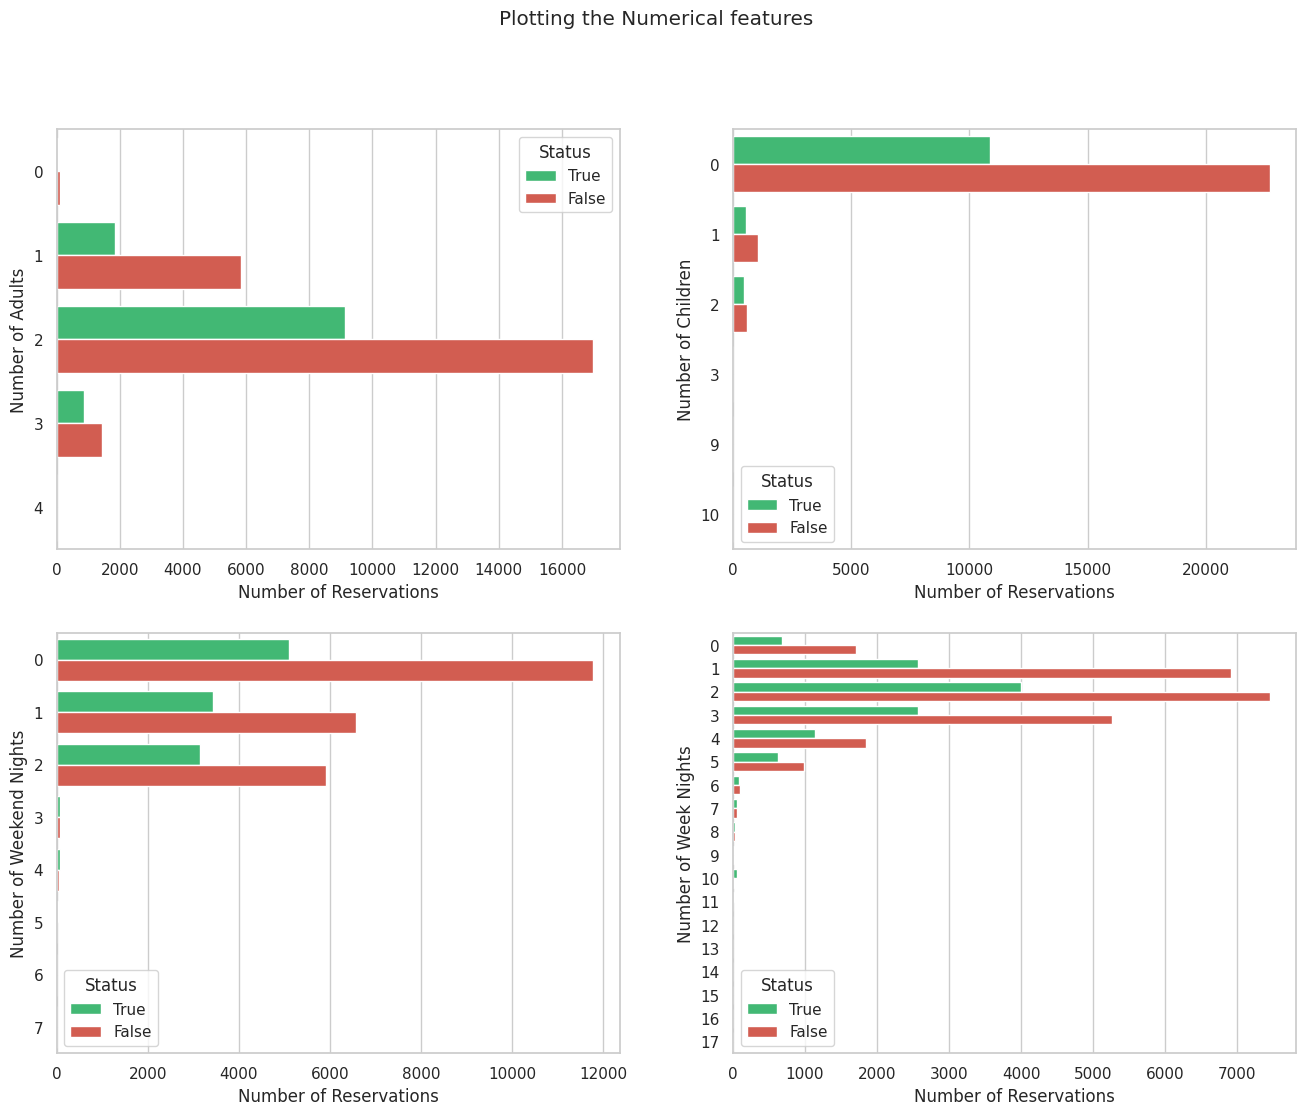

In [10]:
#Plotting the Numerical Features
fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2, 2, figsize=(16,12))
fig.suptitle('Plotting the Numerical features')
numerical_dictionary = {'Number of Adults':axis1,'Number of Children':axis2,  'Number of Weekend Nights':axis3,'Number of Week Nights':axis4}
for key, value in numerical_dictionary.items():
    sns.countplot(data=hotel_reservation_data, y=key, hue='Status', ax=value)
    value.set_xlabel('Number of Reservations')
    value.set_ylabel(f'{key}')
plt.show()

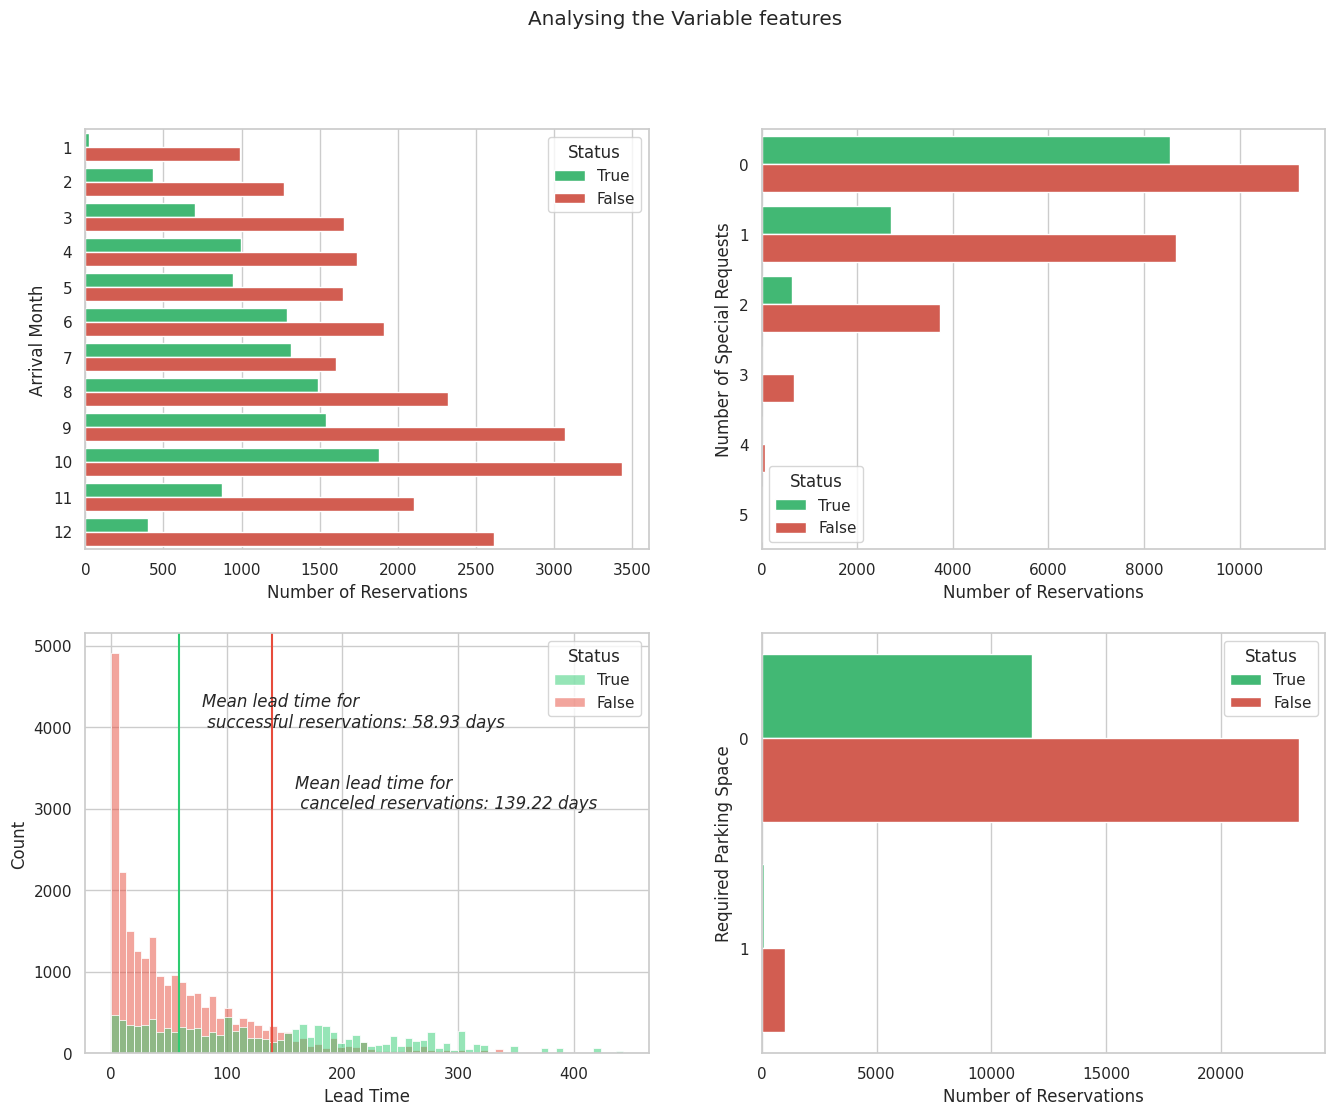

In [11]:
Canceled_Mean_Lead_Time = hotel_reservation_data[hotel_reservation_data['Status'] == True]['Lead Time'].mean()
Not_Canceled_Mean_Lead_Time = hotel_reservation_data[hotel_reservation_data['Status'] == False]['Lead Time'].mean()

fig, ((axis1, axis2), (axis3, axis4)) = plt.subplots(2, 2, figsize=(16,12))

fig.suptitle('Analysing the Variable features')

variable_dictionary = {'Arrival Month':axis1, 'Number of Special Requests':axis2, 'Required Parking Space':axis4}

for key, value in variable_dictionary.items():
    sns.countplot(data=hotel_reservation_data, y=key, hue='Status', ax=value)
    value.set_xlabel('Number of Reservations')
    value.set_ylabel(f'{key}')
    
sns.histplot(data=hotel_reservation_data,x='Lead Time', hue='Status', ax=axis3)
axis3.axvline(x=Canceled_Mean_Lead_Time, color=palette[1])
axis3.axvline(x=Not_Canceled_Mean_Lead_Time, color=palette[0])
axis3.annotate(f'Mean lead time for \n canceled reservations: {Canceled_Mean_Lead_Time:.2f} days', xy=(Canceled_Mean_Lead_Time+20, 3000), fontstyle='italic')
axis3.annotate(f'Mean lead time for \n successful reservations: {Not_Canceled_Mean_Lead_Time:.2f} days', xy=(Not_Canceled_Mean_Lead_Time+20, 4000), fontstyle='italic')
plt.show()